

# Homophily, Assortativity, and Modularity

The tendency of individuals to associate with others whom they perceive to be like themselves is called **homophily**.
Homophily is observed in many network settings, especially in social networks. Think about the people you spend your time with.

- Are they similar in age to you?
- Do they share your race or ethnicity?
- Are they interested in similar things?
- Do they tend to share your political views?

If you answered "yes" to any of these questions, you are likely observing the effects of homophily in your social network.

Informally speaking, a network is said to be **assortative** if a significant fraction of edges are between nodes of the same "type" and **disassortative** if a significant fraction of edges are between nodes of different "types." [What does "significant" mean? There are many ways to operationalize this; we'll chosen one below.]{.aside}
If we divide the notes of a network into types (demographics, interest, views, etc), then we can ask ourselves about the prevalence of connections between nodes of the same type and nodes of different types.

From a vocabulary perspective, "homophily" usually refers to a *process* by which nodes tend to form connections to each other, while "assortative" refers to the static structure of an observed network. So, assortativity is often the result of homophily, although it can also be observed for other reasons.



<!-- In this lecture, we'll examine how to quantify these concepts. -->

## Assortativity and Modularity

Let's make the idea of assortativity more precise. Suppose we have a network in which nodes are classified into a finite set of descriptive values. We'll start with a conceptual definition and then turn that into math.

::: {.callout-note icon=false appearance="minimal"}
::: {#def-assortativity}

A network is **assortative** if nodes of the **same type** are more likely to be connected to each other than what would be expected if nodes connected to each other randomly. [What do we mean by "randomly?" We mean that if you were to take existing edges and ‘rewire’ them by reassigning new sources and targets uniformly at random, while preserving the degree distribution. This roughly corresponds to a configuration model that ignores degrees]{.aside}

A network is **disassortative** if nodes of **different types** are more likely to be connected to each other than what would be expected if nodes connected to each other randomly.

:::
:::

This definition gives us some inspiration on a possible strategy on how to assortativity. Assortativity is defined by a *comparison* to a counterfactual version (or versions) of the network that has the same degree distribution but edges are positioned at random:

$$
\begin{aligned}
    \text{Assortativity} &= \left(\begin{matrix}
    \text{fraction of same-type } \\
    \text{edges in data}
    \end{matrix}\right) -
    \left(\begin{matrix}
    \text{fraction of same-type } \\
    \text{edges expected at random}
    \end{matrix}\right)
\end{aligned}
$$

Let's set up some notation that allow us to compute each of these two terms. Let $Z$ be the set of possible group labels. For example, if there are $g$ groups, then we have $z_i \in \{z_1, \dots, z_g\}$ representing the type of node $i$. To count the total number of same-type edges, we'd like a way to encode 1 every time an edge is between same-type edges. A convenient notational tool for this is the **Kronecker delta** $\delta_{ij}$.

::: {.callout-note icon=false appearance="minimal"}
::: {#def-krondelta}

The **Kronecker delta** is a mapping $\delta_{ij}: \mathbb{N}\times \mathbb{N} \to \{0, 1\}$ that satisfies

$$
    \delta_{ij} = \begin{cases}
        0 & \text{if } i \neq j \,, \\
        1 & \text{if } i = j \,.
    \end{cases}
$$

That is, it returns 1 if the variables are equal, and 0 otherwise.
:::
:::

We now have nice mathematical notation to count the total number of same-type edges that are present in our network:
$$
    \left(\begin{matrix}
    \text{fraction of same-type } \\
    \text{edges in data}
    \end{matrix}\right) = \frac{1}{2} \sum_i \sum_j A_{ij}\delta_{z_iz_j} \,.
$$ {#eq-actual}

Next we need to calculate the expected number of same-type edges. Let's suppose that for this comparison we are keeping some important structural properties of our network the same: we want to make sure that the number of edges $m$ is preserved, as well as the degrees $k_i$ of each of the nodes. [This roughly corresponds to a configuration model random graph with the specified degree sequence, provided that the network is large enough.]{.aside}

Let's pick nodes $i$ and $j$. What is the expected number of edges between them, under this heuristic model? Let's follow configuration-model type thinking and consider each edge of the network to be composed of two half-edges or stubs. We know that there are $k_i$ stubs attached to node $i$ and $k_j$ stubs attached to node $j$, and $2m$ stubs in the entire network (2 for each edge). Let's take on of the $k_i$ stubs attached to node $i$. There are $2m-1$ stubs remaining, of which $k_j$ are attached to node $j$. So, working at random, the probability that that specific stub connects to a stub on node $j$ is $k_j/(2m-1) \approx k_j / 2m$. We have a total of $k_i$ opportunities to connect in this way, so the expected number of edges between $i$ and $j$ is approximately $k_i k_j / 2m$. [This approximation assumes that we don't need to worry about things like node $i$ connecting to node $j$ multiple times. The probability of this event becomes extremely low provided that $m$ is very large and each $k_i$ is not too large in relation to $m$. Heuristically, $k_i \ll \sqrt{2m}$ is sufficient for these approximations to yield good results]{.aside}
With this, we can calculate the expected number of edges between node $i$ and node $j$ is approximately $\frac{k_ik_j}{2m}$. Summing over all possible $i,j$ combinations and again using our Kronecker delta to only count same type edges gives us an approximation for the expected number of edges between same-type node pairs
$$
    \left(\begin{matrix}
    \text{fraction of same-type } \\
    \text{edges expected at random}
    \end{matrix}\right)  = \frac{1}{2} \sum_i \sum_j \frac{k_ik_j}{2m}\delta_{z_iz_j} \,.
$$ {#eq-expected}
We can combine @eq-actual and @eq-expected to get a count of the difference between the actual and expected number of same-type edges:
$$
\begin{align}
    \frac{1}{2} \sum_i \sum_j A_{ij}\delta_{z_iz_j} - \frac{1}{2} \sum_i \sum_j \frac{k_ik_j}{2m}\delta_{z_iz_j} \\
    = \frac{1}{2}\sum_i \sum_j \left( A_{ij} -\frac{k_ik_j}{2m}\right)\delta_{z_iz_j} \,.
\end{align}
$$
This gives us the difference between the actual and expected number of same-type edges. We usually normalize by dividing by the total number of edges in the graph.
This gives us our final formula for measuring assortativity, which is usually called the **modularity**.  [The difference here is that "assortativity" is a general idea, while "modularity" is a specific formula for measuring it.]{.aside}

::: {.callout-note icon=false appearance="minimal"}
::: {#def-modularity}

## Modularity

Let $G = (V,E)$ be a network with a set $Z$ of node label types and a vector $\mathbf{z} \in Z^n$. The **modularity** $Q$ of $G$ with respect to $\mathbf{z}$ is defined to be [For simplicity of notation, we shift from explicitly writing $\sum_i \sum_j$ in favor of writing $\sum_{i,j \in V}$. These mean the same thing!]{.aside}

$$
\begin{align}
    Q(G, \mathbf{z}) \triangleq \frac{1}{2m}\sum_{i,j \in V}\left[A_{ij} - \frac{k_ik_j}{2m}\right]\delta_{z_iz_j} \,.
\end{align}
$${#eq-modularity}

This expression appears as Eq. (7.54) in @newman2018networks and also in @newmanModularityCommunityStructure2006.

:::
:::





In some sense modularity measures the extent to which same-type nodes are connected in a network. Our expression @eq-modularity highlights two things:

- First, we are *comparing* the actual adjacency matrix $\mathbf{A}$ of the graph to the *expected* adjacency matrix with entries $k_ik_j/2m$.
- Second, we are performing this comparison *only* on the edges in which $\delta_{z_iz_j}=1$. These are the edges on which $z_i = z_j$; i.e. the edge joins two nodes in the same group.

## Computing Modularity

Let's write an implementation of the modularity according to @eq-modularity. To do this, we'll use an *array broadcasting* trick. From a vector $\mathbf{z}$ of node labels, I can create a matrix $\Delta$ such that $\Delta_{ij} = \delta_{z_i, z_j}$ like this: [This hidden cell imports Python packages we'll use in the remainder of the nodes.]{.aside}


In [1]:
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt

def unweight(G):
    for source, target in G.edges():
        G[source][target]['weight'] = 1
    return G

In [3]:
z = np.array([0, 1, 1, 0, 0, 1])
delta = 1*(z[:, None] == z[None, :]) # turn z into nx1 and 1xn matrix -> gives us matrix of delta values
delta

k = np.array([1, 5, 2]) # degrees
KK = np.outer(k, k)

array([[1, 0, 0, 1, 1, 0],
       [0, 1, 1, 0, 0, 1],
       [0, 1, 1, 0, 0, 1],
       [1, 0, 0, 1, 1, 0],
       [1, 0, 0, 1, 1, 0],
       [0, 1, 1, 0, 0, 1]])

We can use this trick to construct the individual terms of the modularity as entries in a matrix, which we'll then sum over to get the modularity as a number:

In [13]:
def modularity(G, z):
  A = nx.to_numpy_array(G)
  delta = 1*(z[:, None] == z[None, :]) # turn z into nx1 and 1xn matrix -> gives us matrix of delta values
  k = np.array([G.degree(node) for node in G.nodes()])
  m = np.sum(k)/2
  KK = np.outer(k, k)

  Q = 1/(2 * m) * np.sum((A - KK/(2 * m)) * delta)
  return Q

Let's test this function on the Zachary Karate Club network, which famously fissioned into two groups. First, we'll get the graph and converted it unweighted form:

In [21]:
G = nx.karate_club_graph()
G = unweight(G)

We can extract the labels of the two fissioned clubs using `nx.get_node_attributes`:


In [27]:
nx.get_node_attributes(G, 'club')
z = np.array([G.nodes[i]['club'] for i in G.nodes])
z

array(['Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi',
       'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Officer', 'Mr. Hi', 'Mr. Hi',
       'Mr. Hi', 'Mr. Hi', 'Officer', 'Officer', 'Mr. Hi', 'Mr. Hi',
       'Officer', 'Mr. Hi', 'Officer', 'Mr. Hi', 'Officer', 'Officer',
       'Officer', 'Officer', 'Officer', 'Officer', 'Officer', 'Officer',
       'Officer', 'Officer', 'Officer', 'Officer'], dtype='<U7')

Before we compute the modularity with respect to the label vector `z`, let's also compare to a random label vector.

In [43]:
z_random = z.copy()
np.random.shuffle(z_random)
z_random

array(['Mr. Hi', 'Officer', 'Mr. Hi', 'Mr. Hi', 'Officer', 'Mr. Hi',
       'Mr. Hi', 'Mr. Hi', 'Officer', 'Officer', 'Officer', 'Mr. Hi',
       'Mr. Hi', 'Officer', 'Officer', 'Mr. Hi', 'Officer', 'Officer',
       'Officer', 'Officer', 'Mr. Hi', 'Officer', 'Mr. Hi', 'Mr. Hi',
       'Mr. Hi', 'Mr. Hi', 'Officer', 'Officer', 'Officer', 'Mr. Hi',
       'Officer', 'Mr. Hi', 'Mr. Hi', 'Officer'], dtype='<U7')

Now we can compare the modularity of the graph under the random labels and the true labels.

In [48]:
Q        = modularity(G, z)
Q_random = modularity(G, z_random)

print(f"Q: {Q:.3f}")
print(f"Q_random: {Q_random:.3f}")

Q: 0.358
Q_random: 0.033


We can see that the higher modularity corresponds to a visually more intuitive separation of the graph into groups:

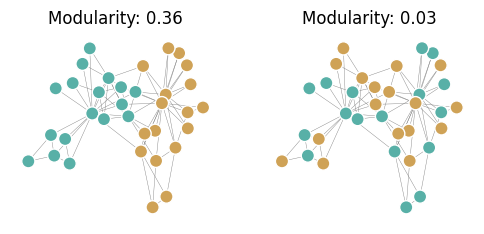

In [49]:
z_binary = z == "Mr. Hi"
z_binary_random = z_random == "Mr. Hi"

fig, ax = plt.subplots(1, 2, figsize = (6, 2.5))
pos = nx.spring_layout(G)

nx.draw(G, pos, ax = ax[0], node_color = z_binary, cmap = plt.cm.BrBG,  vmin = -0.5, vmax = 1.5, edgecolors = 'white', edge_color = "grey", node_size = 90, width = 0.3)
ax[0].set_title(f"Modularity: {Q:.2f}")

nx.draw(G, pos, ax = ax[1], node_color = z_binary_random, cmap = plt.cm.BrBG,  vmin = -0.5, vmax = 1.5, edgecolors = 'white', edge_color = "grey", node_size = 90, width = 0.3)
mod = ax[1].set_title(f"Modularity: {Q_random:.2f}")

## Another Perspective on Modularity

We've developed the modularity from the idea of comparing the observed proportion of within-cluster edges to the expected proportion of within-cluster edges under a random graph model. This is useful, but let's also take another point of view that highlights the "balancing act" that modularity expresses. [This derivation follows Newman eq. 7.55 through 7.58, and is the original formulation of modularity due to @newman2004finding.]{.aside}

Let $Z$ be the set of possible group labels. For example, $Z = \{z_1,z_2,\ldots,z_g \}$ for some $g$. For each label $\ell \in Z$, define
$$
e_\ell \triangleq \frac{1}{2m}\sum_{i,j\in V}A_{ij}\delta_{z_i, \ell}\delta_{z_j, \ell} \quad \text{and} \quad f_\ell \triangleq \frac{1}{2m}\sum_{i\in V} k_i \delta_{z_i, \ell}\;.
$$

Intuitively, $e_\ell$ counts the fraction of total edges that pass between two nodes in cluster $\ell$, while $f_\ell$ counts the fraction of all edges that are attached to nodes in cluster $\ell$. We can think of $f_\ell$ as a measure of the weighted size of the cluster; a cluster is "large" according to $f_\ell$ when it has many nodes of high degree.

We're going to find copies of these expressions in $Q$. The "trick" is to note that we can do fancy things with the $\delta$-function, like this:[Take a minute to figure out why this is true.]{.aside}
$$
\delta_{z_i, z_j} = \sum_{\ell \in Z}\delta_{z_i,\ell}\delta_{z_j,\ell}
$${#eq-delta-fancy}
Inserting @eq-delta-fancy and doing some algebra, we find
$$
\begin{aligned}
Q(G, \mathbf{z}) &= \frac{1}{2m}\sum_{i,j \in V}\left[A_{ij} - \frac{k_ik_j}{2m}\right]\delta_{z_i, z_j} \\
&= \frac{1}{2m}\sum_{i,j \in V}\left[A_{ij} - \frac{k_ik_j}{2m}\right]\sum_{\ell \in Z}\delta_{z_i,\ell}\delta_{z_j,\ell} \\
&= \frac{1}{2m}\sum_{\ell \in Z}\sum_{i,j \in V}\left[A_{ij}\delta_{z_i,\ell}\delta_{z_j,\ell} - \frac{k_ik_j}{2m}\delta_{z_i,\ell}\delta_{z_j,\ell}\right] \\
&= \sum_{\ell \in Z}\left[e_\ell - \frac{1}{(2m)^2}\sum_{i,j \in V}k_i\delta_{z_i,\ell}k_j\delta_{z_j,\ell}\right] \\
&= \sum_{\ell \in Z}\left[e_\ell - \frac{1}{(2m)^2}\left(\sum_{i \in V}k_i\delta_{z_i,\ell}\right)\left(\sum_{j \in V}k_j\delta_{z_j,\ell}\right)\right] \\
&= \sum_{\ell \in Z}\left[e_\ell - f_\ell^2\right]\;. \\
\end{aligned}
$${#eq-modularity-compact}
This compact expression for the modularity helps us interpret the expression in a new way. Remember that we consider the network to be assortative when $Q(G, \mathbf{z})$ is large, i.e., when $e_\ell$ is large and $f_\ell^2$ is small for each $\ell$. [This is a pretty common kind of balancing act in many optimization settings.]{.aside} What does it mean here?

Well, $\sum_{\ell \in Z} e_\ell$ is the fraction of all edges that join nodes in the same group. One extreme case is when every node is in the same group: Then, $\sum_{\ell \in Z} e_\ell = 1$. The term $f_\ell$ tell us the fraction of ends of edges attached to nodes of type $\ell$. Because of this, $\sum_{\ell}f_\ell = 1.$ This means that $\sum_{\ell} f_\ell^2$ can be reasonably small in the case where groups have approximately equal sizes.
[This is related to the optimization problem
$$
\min_{\mathbf{x}\in \mathbb{R}^k} \sum_{\ell\in Z}x_\ell^2 \ \text{ such that } \ \sum_{\ell \in Z}x_\ell = 1\;.
$$
We can solve this problem using Lagrange multipliers, obtaining the solution $x_\ell = 1/k$ for each $\ell$. We will explore the idea of optimization and modularity more deeply in a few lectures when we discuss community detection.]{.aside}

## Up Next: Modularity and Community Detection

While modularity is a useful measure for assessing the assortativity of a graph with respect to a label vector, its most important application is as an optimization objective. If we don't have a label vector available, can we *estimate* one from the pure graph structure by trying to find a vector that makes the modularity large? This is the method of *modularity maximization*, which has historically been one of the most popular approaches to graph partitioning and community detection in the network science community. We'll turn to this approach in the next chapter.


## References
